In [174]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
import matplotlib.pyplot as plt

In [175]:
dataset=pd.read_csv('data.csv')

In [176]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<AxesSubplot:>

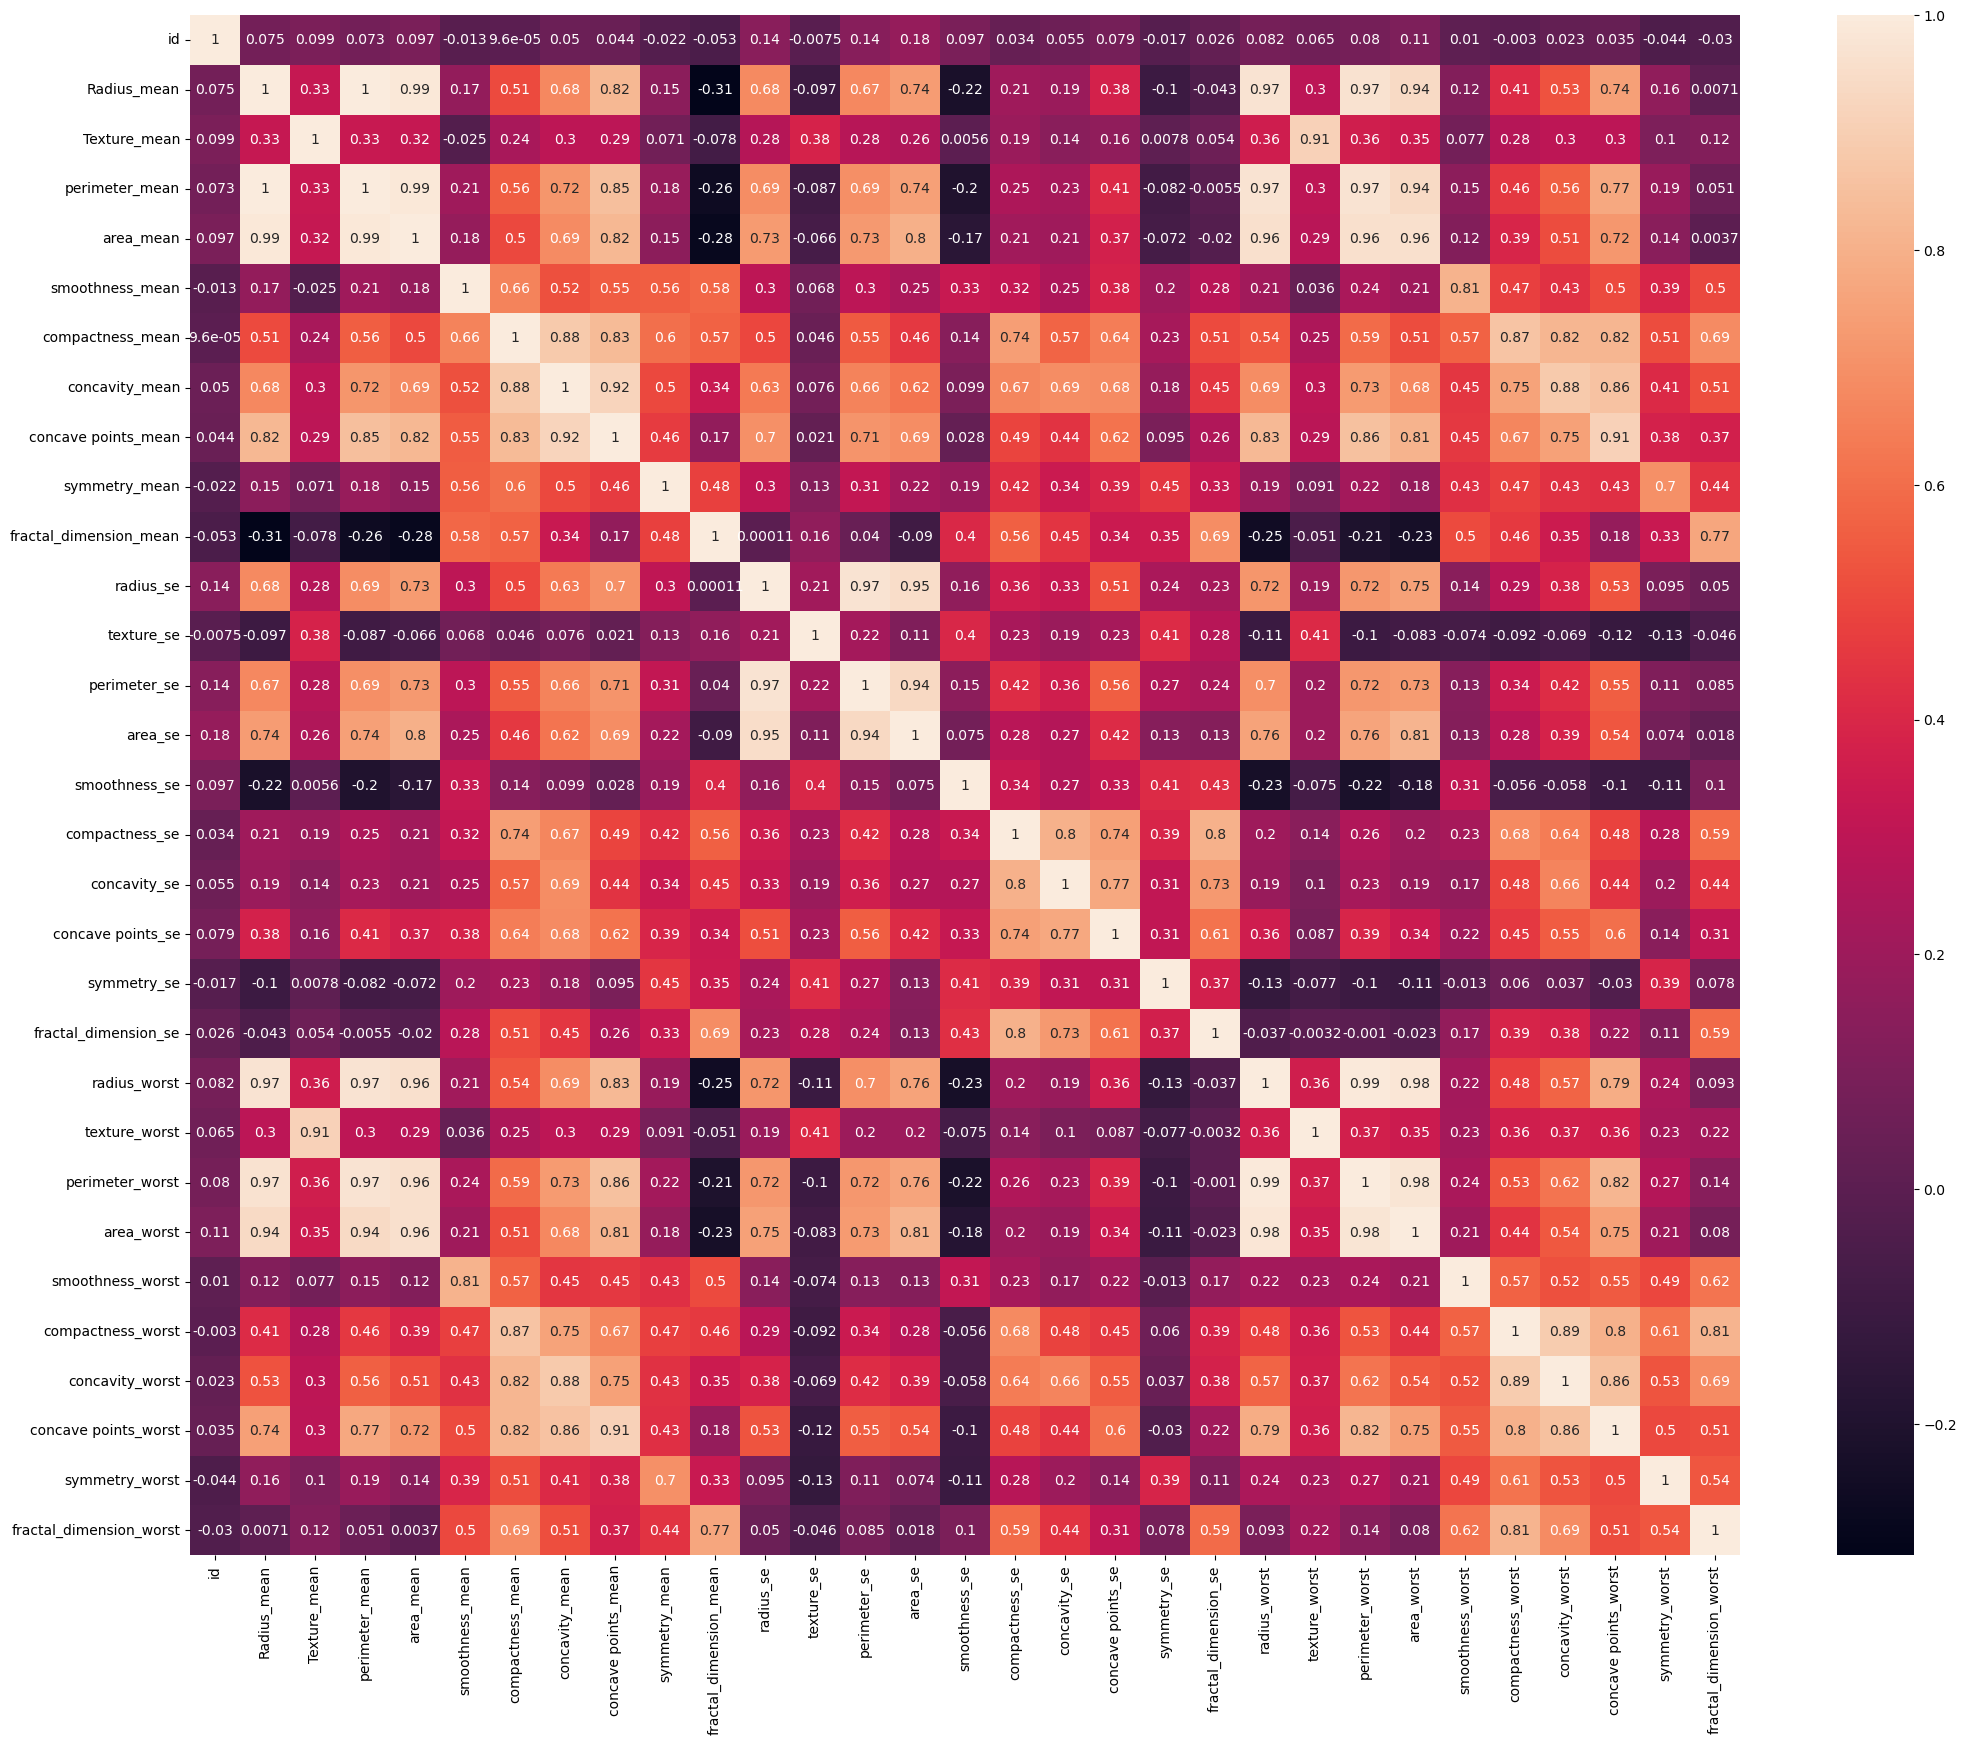

In [177]:
plt.figure(figsize=(25,20))
sns.heatmap(data=dataset.corr(), annot=True)

In [178]:
dataset.drop(['id'], axis='columns', inplace=True)
dataset.drop(['perimeter_mean', 'perimeter_se', 'perimeter_worst'], axis='columns', inplace=True)
dataset.drop(['Radius_mean', 'radius_se', 'radius_worst'], axis='columns', inplace=True)
dataset.drop(['symmetry_se','texture_se','smoothness_se','fractal_dimension_se'], axis='columns', inplace=True)
dataset.drop('fractal_dimension_mean',axis='columns', inplace=True)
dataset.drop('Texture_mean',axis='columns', inplace=True)
dataset.drop(['area_mean','compactness_worst'],axis='columns', inplace=True)

In [179]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})

In [180]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   smoothness_mean          569 non-null    float64
 2   compactness_mean         569 non-null    float64
 3   concavity_mean           569 non-null    float64
 4   concave points_mean      569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   area_se                  569 non-null    float64
 7   compactness_se           569 non-null    float64
 8   concavity_se             569 non-null    float64
 9   concave points_se        569 non-null    float64
 10  texture_worst            569 non-null    float64
 11  area_worst               569 non-null    float64
 12  smoothness_worst         569 non-null    float64
 13  concavity_worst          569 non-null    float64
 14  concave points_worst     5

In [181]:
print(dataset.isna().sum())

diagnosis                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
area_se                    0
compactness_se             0
concavity_se               0
concave points_se          0
texture_worst              0
area_worst                 0
smoothness_worst           0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [182]:
scaler = MinMaxScaler()
X = dataset.drop('diagnosis', axis=1)
X = scaler.fit_transform(X)
y = dataset['diagnosis']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [184]:
model = LogisticRegression()

In [185]:
model.fit(X_train, y_train)

LogisticRegression()

In [186]:
train_score = model.score(X_train, y_train)*100
print("Training score:", train_score)

test_score = model.score(X_test, y_test)*100
print("Testing score:", test_score)

Training score: 95.30516431924883
Testing score: 95.8041958041958


Accuracy: 95.8041958041958


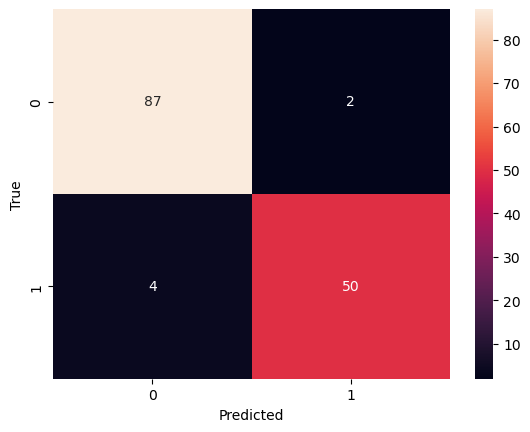

In [187]:
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()